<center><table>
    <tr>
        <th><img src="./INL1.png",align="middle",height="10000"/></th>
        <th><img src="./MIT1.png",align="middle",height="10"\></th>
        <th><img src="./ANL.png",align="middle",height="10"/></th>
    </tr>
</table>
</center>

# <center>Cost Reduction Framework for Nuclear Reactor Power Plants</center>

###  Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [2]:
%%capture

# Just running the other jupyter notebook to bring all the functions from there
%run CostReduction_exploration_mode.ipynb 

In [3]:
# A function for the average results (averaged over all the reactors built)

def calculate_final_result_avg(reactor_type, f_22, f_2321, land_cost_per_acre_0, RB_grade_0, BOP_grade_0,\
    num_orders, design_completion_0, ae_exp_0, N_AE, ce_exp_0, N_cons, mod_0, Design_Maturity_0, proc_exp_0, N_proc, standardization_0, interest_rate_0, startup_0):
    
    
    OCC_list = []
    TCI_list = [] 
    durations_list = []
    
    for n_th in range(1, num_orders+1):
        results = calculate_final_result(reactor_type, n_th, f_22, f_2321, land_cost_per_acre_0, RB_grade_0, BOP_grade_0,\
        num_orders, design_completion_0, ae_exp_0, N_AE, ce_exp_0, N_cons, mod_0, Design_Maturity_0, proc_exp_0, N_proc,\
            standardization_0, interest_rate_0, startup_0, ITC_0, n_ITC) 
        
        OCC_result = results[1] # The ITC_reduced OCC (levelized)
        TCI_result = results[2] # The ITC_reduced TCI(levelized)
        duration_result = results[3] # cons duration
        
        OCC_list.append(OCC_result)
        TCI_list.append( TCI_result )
        durations_list.append( duration_result  )
    last_plant_OCC = OCC_list[-1]
    first_plant_OCC = OCC_list[0]
    avg_OCC = np.mean(OCC_list)    
    
    last_plant_TCI = TCI_list[-1]
    first_plant_TCI = TCI_list[0]
    avg_TCI = np.mean(TCI_list)
    
    avg_dur = np.mean(durations_list)
    
    # note that all the OCC and TCI here are TCI-reduced
    return last_plant_OCC , first_plant_OCC, avg_OCC,  last_plant_TCI , first_plant_TCI, avg_TCI, avg_dur   

# Scenarios

These scenarios correspond to the scenarios in the cost reduction [report](https://inldigitallibrary.inl.gov/sites/sti/sti/Sort_109810.pdf)

See Table 10


In [4]:
reactor_type = "Concept A"

# scenario independent params
mod_0 = "modularized"
BOP_grade_0 = "non_nuclear"
RB_grade_0 = "nuclear"

land_cost_per_acre_0 =  22000 # dollars/acre
startup_0 = 16 
interest_rate_0 = 0.06

# numb er of projects for full efficiency of procurement, A/E, Construction
N_proc = 3
N_AE  =  4
N_cons = 5

# factory building cost (associated with accounts 22 and 232.1)
f_22   = 250000000
f_2321 = 150000000



for scenario in [1, 2, 3 ]:
    if scenario == 1:
        num_orders = 13
        design_completion_0 = 0.8 # 1 means 100%
        Design_Maturity_0 = 1
        proc_exp_0 = 0.5 #     
        ae_exp_0 = 0.5
        ce_exp_0 = 1
        
        standardization_0 = 0.8 # 0.7 corresponds to 70% standardization for PWRs
        ITC_0 = 0 
        n_ITC = 0

    elif scenario == 2:
        num_orders = 18
        design_completion_0 = 0.6 # 1 means 100%
        Design_Maturity_0 = 0
        
        proc_exp_0= 0 # 2 means procurement experts. This is ideal. 
        ae_exp_0 = 0
        ce_exp_0 = 1
        standardization_0 = 0.7 # 0.7 corresponds to 70% standardization for PWRs

        ITC_0 = 0 
        n_ITC = 0        
        
    elif scenario == 3:
        num_orders = 13
        design_completion_0 = 0.8 # 1 means 100%
        Design_Maturity_0 = 1
        
        proc_exp_0= 0.5 # 2 means procurement experts. This is ideal. 
        ae_exp_0 = 0.5
        ce_exp_0 = 1
        standardization_0 = 0.8 # 0.7 corresponds to 70% standardization for PWRs
        ITC_0 = 0.4
        n_ITC = 4 
     
     
    avg_results = calculate_final_result_avg(reactor_type, f_22, f_2321, land_cost_per_acre_0, RB_grade_0, BOP_grade_0,\
    num_orders, design_completion_0, ae_exp_0, N_AE, ce_exp_0, N_cons, mod_0, Design_Maturity_0, proc_exp_0, N_proc, standardization_0, interest_rate_0, startup_0) 
    
    
    print("\n")  
    print(f"Scenario # {scenario}")
    
    # note the results are rounded to the nearest hundred
    print(f"Last plant ITC-reduced OCC is {int(100*np.round (avg_results[0]/100, 0))} ($/kWe)")
    print(f"First plant ITC-reduced OCC is {int(100*np.round (avg_results[1]/100, 0))} ($/kWe)")
    print(f"Average ITC-reduced OCC is {int(100*np.round (avg_results[2]/100, 0))} ($/kWe)")
    print("\n")
    print(f"Last plant ITC-reduced TCI is {int(100*np.round (avg_results[3]/100, 0))} ($/kWe)")
    print(f"First plant ITC-reduced TCI is {int(100*np.round (avg_results[4]/100, 0))} ($/kWe)")
    print(f"Average plant ITC-reduced TCI is {int(100*np.round (avg_results[5]/100, 0))} ($/kWe)")
    print("\n")
    print(f"Average Construction Duration is {int(np.round(avg_results[6],0))} months ")




Scenario # 1
Last plant ITC-reduced OCC is 3600 ($/kWe)
First plant ITC-reduced OCC is 12800 ($/kWe)
Average ITC-reduced OCC is 5000 ($/kWe)


Last plant ITC-reduced TCI is 4200 ($/kWe)
First plant ITC-reduced TCI is 19500 ($/kWe)
Average plant ITC-reduced TCI is 6400 ($/kWe)


Average Construction Duration is 77 months 


Scenario # 2
Last plant ITC-reduced OCC is 3600 ($/kWe)
First plant ITC-reduced OCC is 15900 ($/kWe)
Average ITC-reduced OCC is 5000 ($/kWe)


Last plant ITC-reduced TCI is 4200 ($/kWe)
First plant ITC-reduced TCI is 25700 ($/kWe)
Average plant ITC-reduced TCI is 6500 ($/kWe)


Average Construction Duration is 77 months 


Scenario # 3
Last plant ITC-reduced OCC is 3600 ($/kWe)
First plant ITC-reduced OCC is 8000 ($/kWe)
Average ITC-reduced OCC is 4100 ($/kWe)


Last plant ITC-reduced TCI is 4200 ($/kWe)
First plant ITC-reduced TCI is 14700 ($/kWe)
Average plant ITC-reduced TCI is 5500 ($/kWe)


Average Construction Duration is 77 months 


# Sensitivity Analysis

In [5]:
startup_0 = 16
interest_rate_0 = 0.06
design_completion_0 = 0.8
Design_Maturity_0 = 1
proc_exp_0 = 0.5
ae_exp_0 = 0.5
ce_exp_0 = 1

mod_0 = 'modularized'
standardization_0 = 0.8
BOP_grade_0 = 'non_nuclear'
ITC_0 = 0
n_ITC = 0
RB_grade_0 = 'nuclear'

reactor_type = "Concept A"



TCI_list_avg = []
OCC_list_avg = []
orders_list = []
for num_orders in range(4,21):
    print(f"number of orders = {num_orders}")
    OCC_list = []
    TCI_list = []  
    # for n_th in range(1, num_orders+1):
    results = calculate_final_result_avg(reactor_type, f_22, f_2321, land_cost_per_acre_0, RB_grade_0, BOP_grade_0,\
num_orders, design_completion_0, ae_exp_0, N_AE, ce_exp_0, N_cons, mod_0, Design_Maturity_0, proc_exp_0, N_proc, standardization_0, interest_rate_0, startup_0)
        
    
    OCC_list_avg.append(results[2])
    TCI_list_avg.append(results[5])
    
    orders_list.append(num_orders)

number of orders = 4
number of orders = 5
number of orders = 6
number of orders = 7
number of orders = 8
number of orders = 9
number of orders = 10
number of orders = 11
number of orders = 12
number of orders = 13
number of orders = 14
number of orders = 15
number of orders = 16
number of orders = 17
number of orders = 18
number of orders = 19
number of orders = 20


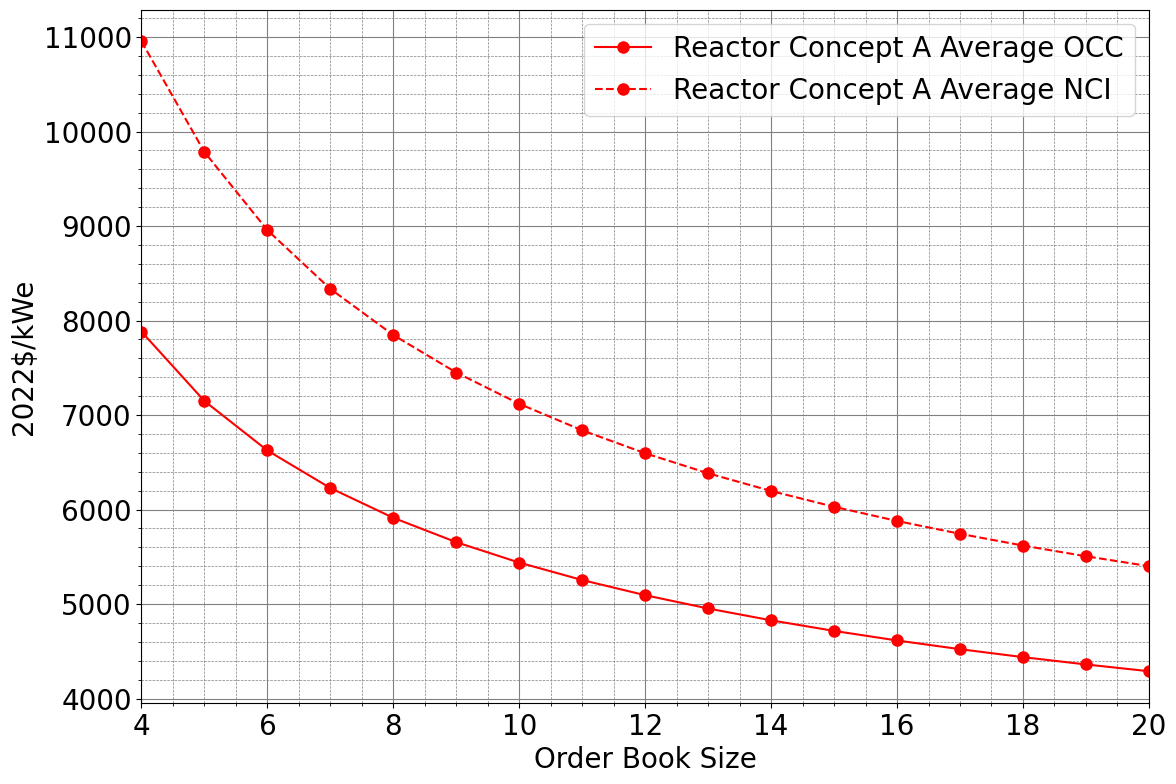

In [6]:
plt.figure(figsize=(13, 9))
plt.plot(orders_list, OCC_list_avg, linestyle='-', marker='o', markersize=8, label= "Reactor Concept A Average OCC", color='red') 
plt.plot(orders_list, TCI_list_avg, linestyle='dashed', marker='o', markersize=8, label= "Reactor Concept A Average NCI", color='red')



plt.legend()    # g.set_xticks(range(1,22,2))


plt.xlabel('Order Book Size', fontsize='20') # x-axis name
plt.ylabel('2022$/kWe', fontsize='20') # x-axis name

# # plt.ylabel('Order BookAveraged TCI (2022$/kWe)', fontsize='25') # x-axis name
plt.legend(loc='upper right', fontsize='20') # Add a legend
plt.tick_params(labelsize=20)
plt.xlim(4, 20)

plt.grid(which='major', color='grey', linewidth=0.8)
plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
plt.minorticks_on()

plt.savefig('orders.png')
plt.show() # Display the graph
